0
1


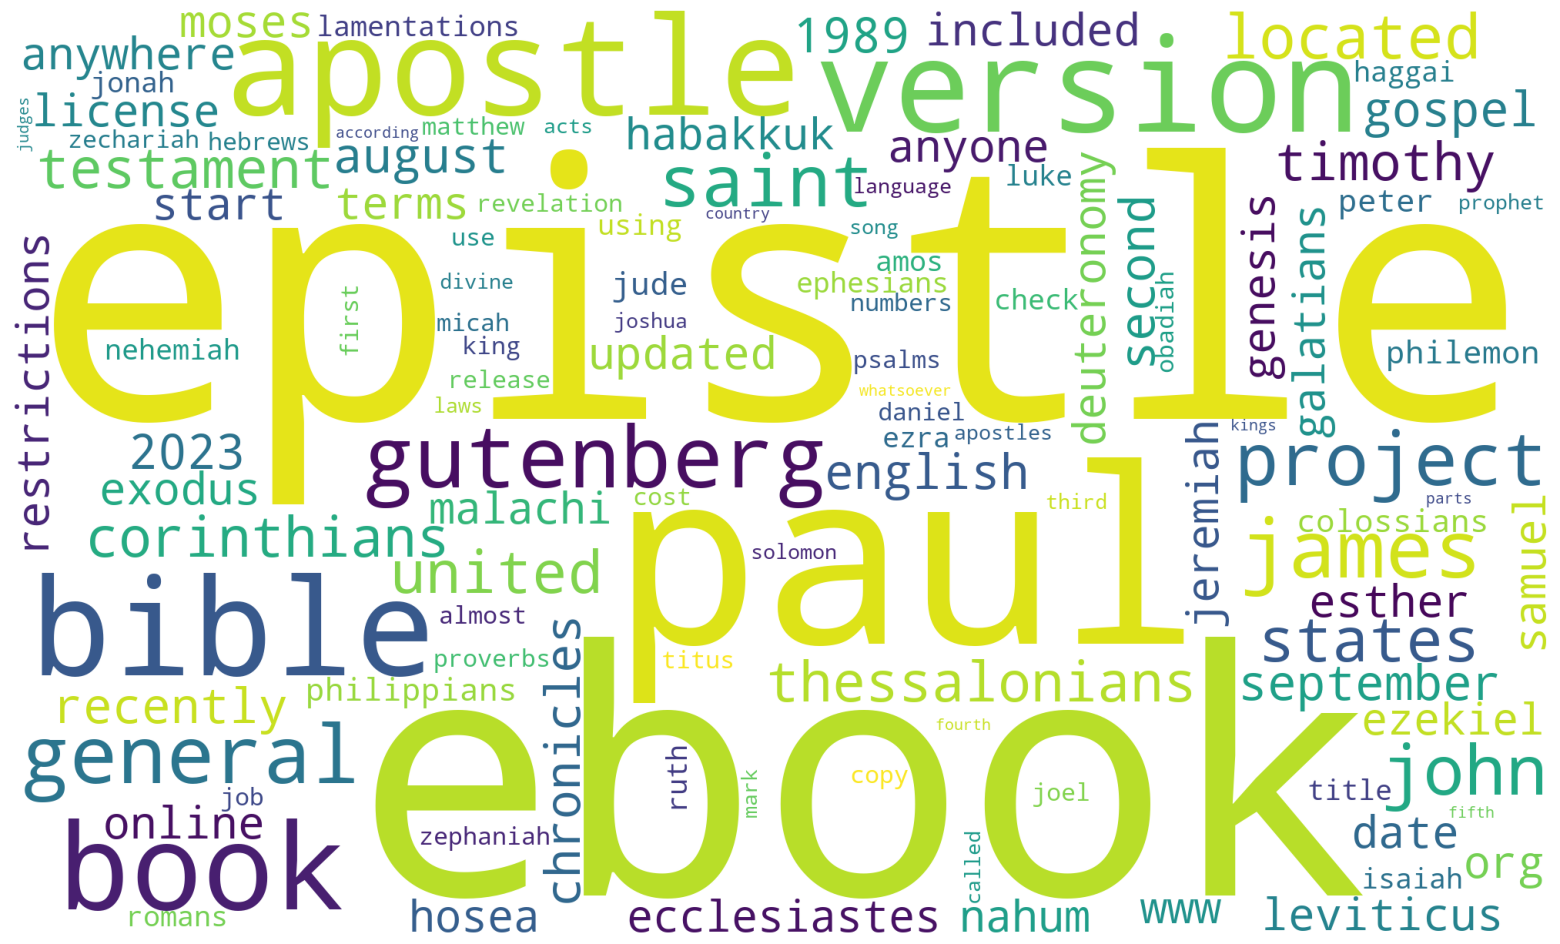

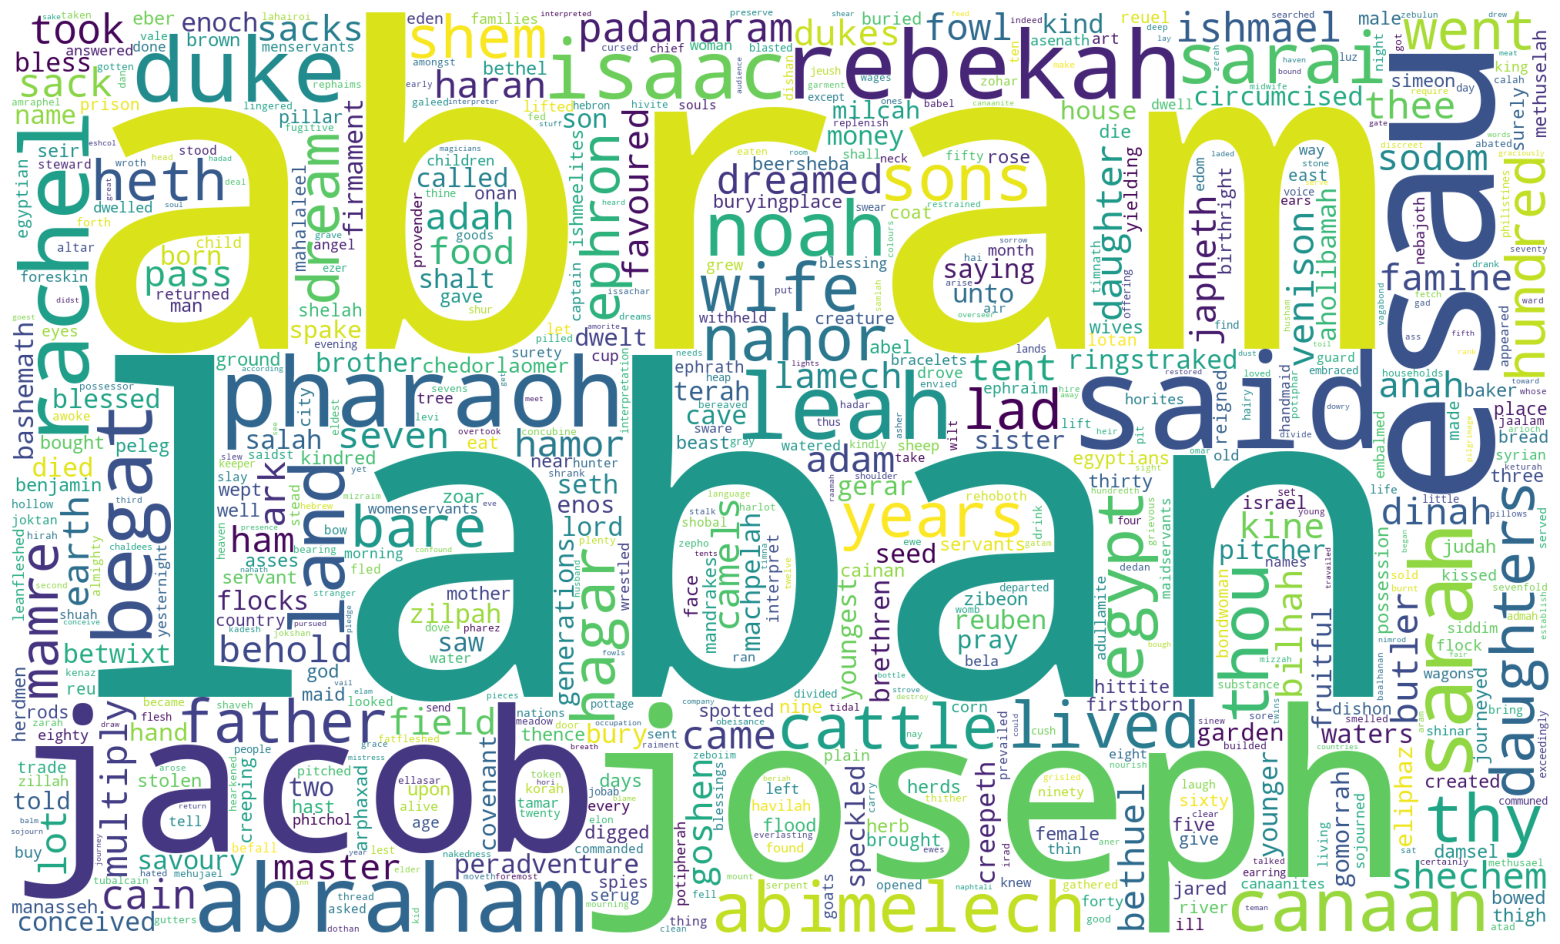

In [11]:
with open("gutenber_bible.txt", encoding="utf-8") as f:
    raw_text = f.read()

with open("NLTK's list of english stopwords.txt", encoding='utf-8') as f:
    stopwords = [word for line in f for word in line.split()]

chapters_raw = raw_text.split("\n\n\n\n\n")

import re
chapters = [re.sub("[^a-z0-9]+", " ", chapter.lower()).split(" ") for chapter in chapters_raw]

filtered_chapters = [[w for w in chapter if not w in stopwords and len(w) >= 3] for chapter in chapters]

n = len(chapters)
rng = range(n)

TF = []
for chapter in filtered_chapters:
    count = {}
    for word in chapter:
        if word not in count:
            count[word] = 1
        else:
            count[word] += 1
    TF.append(count)

TFIDFs = []

import math
for i,chapter in enumerate(filtered_chapters):
    print(i)
    TFIDF = {}
    for word in chapter:
        k = 0
        for chapter in filtered_chapters:
            if word in chapter:
                k += 1
        IDF = math.log2(n/k)
        TFIDF[word] = int(TF[i][word] * IDF)

    TFIDFs.append(TFIDF)

import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

for i in rng:
    word_cloud = WordCloud(width=2000, height=1200,
                        background_color='white',
                        max_words=1000,
                        min_font_size=10).generate_from_frequencies(TFIDFs[i])
    plt.figure(figsize=(20,12))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.savefig('wordclouds/chapter_{}.png'.format(i), dpi=300)
    plt.show()